
## Data visualization and analysis

## Data cleaning and preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('Instagram data.csv', encoding = 'latin1')

In [ ]:
def get_missing_values(df):
    missing_values = df.isnull().sum()
    missing_values.sort_values(ascending=False, inplace=True)
    return missing_values
get_missing_values(df)

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


## Descriptive Statistics

In [ ]:
df[['Impressions','From Home','From Hashtags','From Explore','From Other']].describe()

Impressions     From Home  From Hashtags  From Explore   From Other
count    119.000000    119.000000     119.000000    119.000000   119.000000
mean    5703.991597   2475.789916    1887.512605   1078.100840   171.092437
std     4843.780105   1489.386348    1884.361443   2613.026132   289.431031
min     1941.000000   1133.000000     116.000000      0.000000     9.000000
25%     3467.000000   1945.000000     726.000000    157.500000    38.000000
50%     4289.000000   2207.000000    1278.000000    326.000000    74.000000
75%     6138.000000   2602.500000    2363.500000    689.500000   196.000000
max    36919.000000  13473.000000   11817.000000  17414.000000  2547.000000

In [ ]:
df[['Saves','Comments','Shares','Likes','Profile Visits','Follows']].describe()

Saves    Comments      Shares       Likes  Profile Visits  \
count   119.000000  119.000000  119.000000  119.000000      119.000000   
mean    153.310924    6.663866    9.361345  173.781513       50.621849   
std     156.317731    3.544576   10.089205   82.378947       87.088402   
min      22.000000    0.000000    0.000000   72.000000        4.000000   
25%      65.000000    4.000000    3.000000  121.500000       15.000000   
50%     109.000000    6.000000    6.000000  151.000000       23.000000   
75%     169.000000    8.000000   13.500000  204.000000       42.000000   
max    1095.000000   19.000000   75.000000  549.000000      611.000000   

          Follows  
count  119.000000  
mean    20.756303  
std     40.921580  
min      0.000000  
25%      4.000000  
50%      8.000000  
75%     18.000000  
max    260.000000

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nhaquyen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

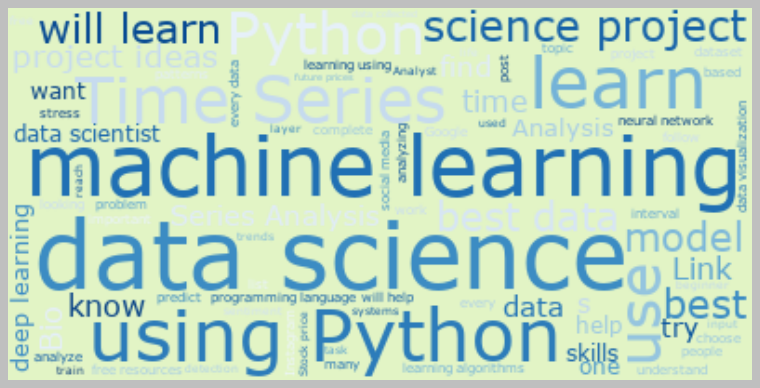

In [ ]:
text = " ".join(i for i in df.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="#E2F4C5", font_path='/Library/Fonts/Verdana.ttf',colormap='Blues').generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

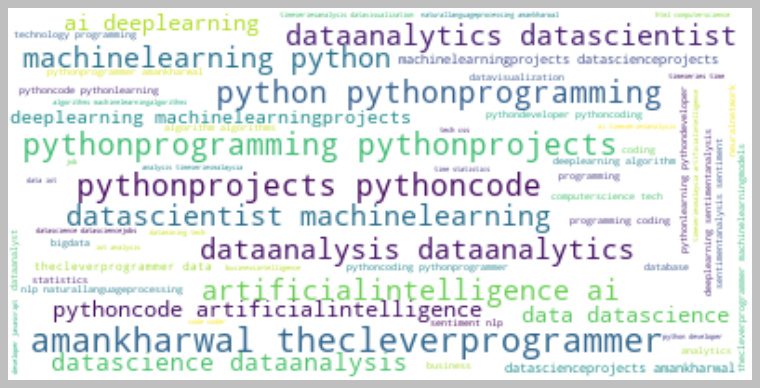

In [ ]:
text = " ".join(i for i in df.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# EDA

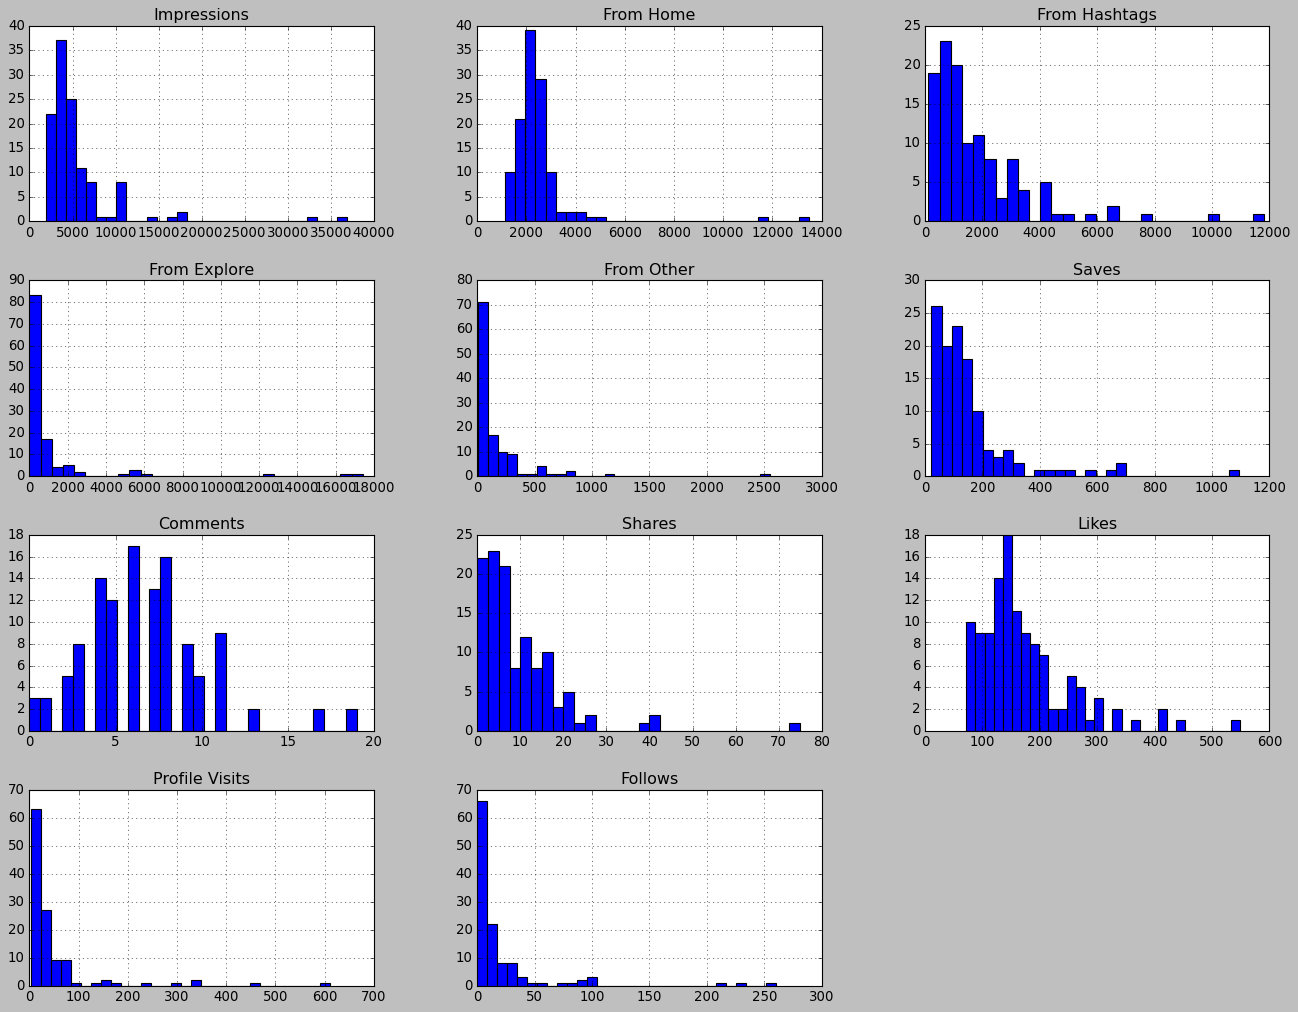

In [ ]:
df.hist(bins=30, figsize=(20, 15));


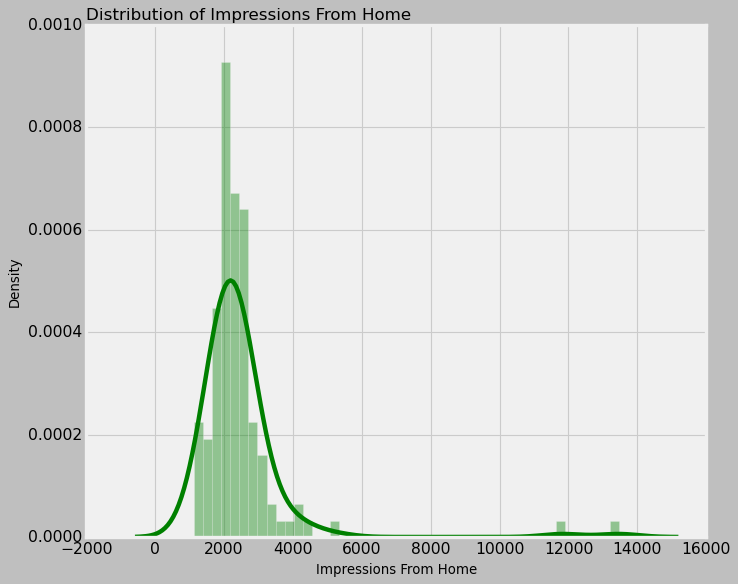

In [ ]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home",fontsize=15,loc='left')
sns.distplot(df['From Home'],color='green')
plt.xlabel('Impressions From Home',fontsize=12,loc='center')
plt.ylabel('Density',fontsize=12,loc='center')
plt.show()

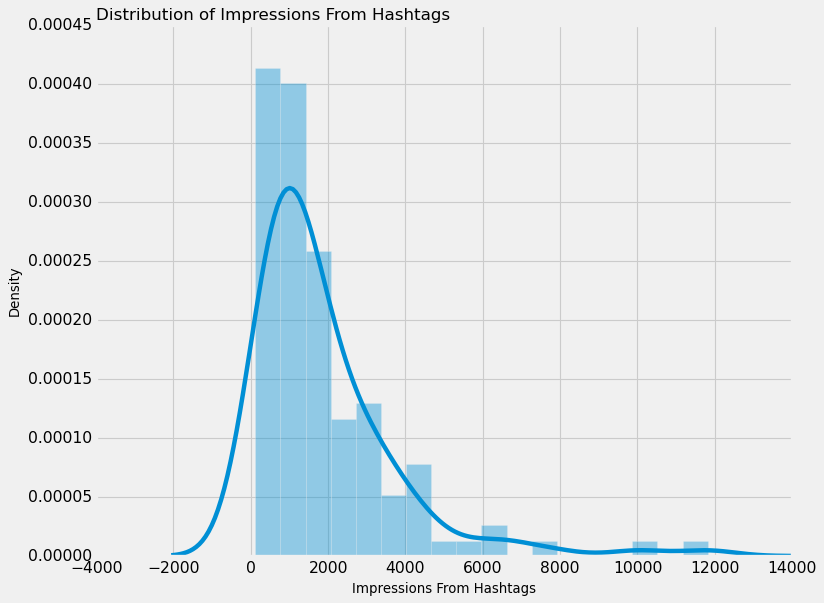

In [ ]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Hashtags",fontsize=15,loc='left')
sns.distplot(df['From Hashtags'])
plt.xlabel('Impressions From Hashtags',fontsize=12,loc='center')
plt.ylabel('Density',fontsize=12,loc='center')
plt.show()

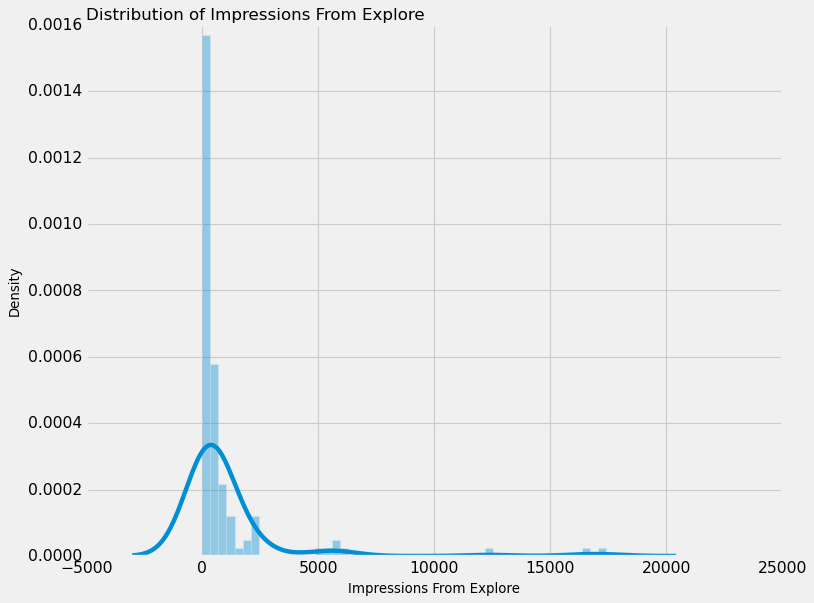

In [ ]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Explore",fontsize=15,loc='left')
sns.distplot(df['From Explore'])
plt.xlabel('Impressions From Explore',fontsize=12,loc='center')
plt.ylabel('Density',fontsize=12,loc='center')
plt.show()

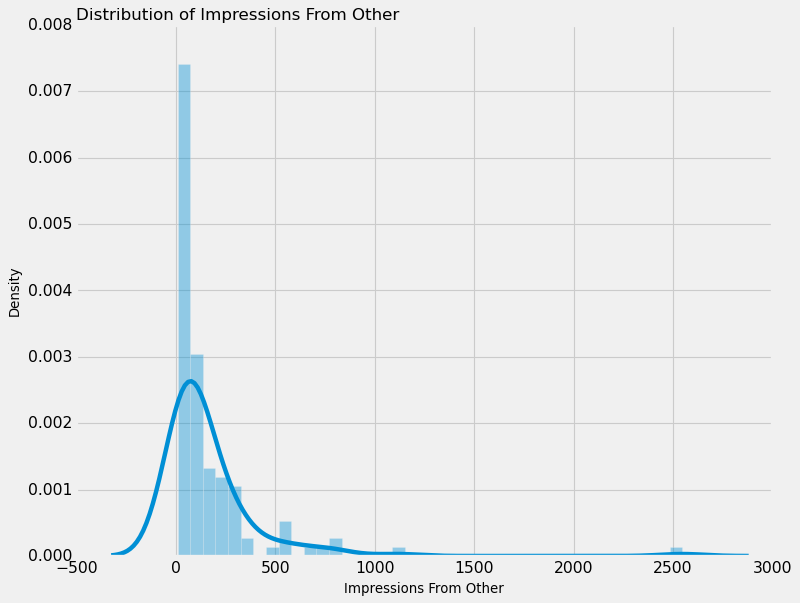

In [ ]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Other",fontsize=15,loc='left')
sns.distplot(df['From Other'])
plt.xlabel('Impressions From Other',fontsize=12,loc='center')
plt.ylabel('Density',fontsize=12,loc='center')
plt.show()

In [ ]:
import plotly.graph_objects as go
home = df["From Home"].sum()
hashtags = df["From Hashtags"].sum()
explore = df["From Explore"].sum()
other = df["From Other"].sum()
labels = ['From Home','From Hashtags','From Explore','From Other']
values = [home, hashtags, explore, other]
colors= ['#EADFB4','#9BB0C1','#51829B','#F6995C']
#fig = px.pie(df, values=values, names=labels,
             #title='Impressions on Instagram Posts From Various Sources')
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.1, 0, 0.1, 0])])
fig.update_traces(marker=dict(colors=colors))
fig.update_layout(title_text="Impressions on Instagram Posts From Various Sources")
fig.show()

In [ ]:
df['Python hashtag'] = df['Hashtags'].str.contains('#pythonprogramming').astype(int)
df['data science caption'] = df['Caption'].str.contains('data science').astype(int)
df[['Hashtags','Caption','Python hashtag','data science caption']].head(10)

Hashtags  \
0  #finance #money #business #investing #investme...   
1  #healthcare #health #covid #data #datascience ...   
2  #data #datascience #dataanalysis #dataanalytic...   
3  #python #pythonprogramming #pythonprojects #py...   
4  #datavisualization #datascience #data #dataana...   
5  #data #datascience #dataanalysis #dataanalytic...   
6  #stockmarket #investing #stocks #trading #mone...   
7  #python #pythonprogramming #pythonprojects #py...   
8  #dataanalytics #datascience #data #machinelear...   
9  #python #pythonprogramming #pythonprojects #py...   

                                             Caption  Python hashtag  \
0  Here are some of the most important data visua...               1   
1  Here are some of the best data science project...               1   
2  Learn how to train a machine learning model an...               1   
3  Heres how you can write a Python program to d...               1   
4  Plotting annotations while visualizing your da...               1   
5  Here are some of the most important soft skill...               1   
6  Learn how to analyze a candlestick chart as a ...               0   
7  Here are some of the best books that you can f...               1   
8  Here are some of the best data analysis projec...               1   
9  Here are two best ways to count the number of ...               1   

   data science caption  
0                     0  
1                     1  
2                     0  
3                     0  
4                     0  
5                     0  
6                     0  
7                     0  
8                     0  
9                     0

## In-depth Analysis

In [ ]:
figure = px.scatter(data_frame = df, x="Impressions",
                    y="Saves", size = 'Saves',color_discrete_sequence=['pink'], trendline = "ols",
                    title = "Relationship Between Post Saves and Impressions")
figure.show()

In [ ]:
figure = px.scatter(data_frame = df, x="Impressions",
                    y="Comments", size="Comments",color_discrete_sequence=['pink'], trendline="ols",
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

In [ ]:
figure = px.scatter(data_frame = df, x="Impressions",
                    y="Likes", size = 'Likes',color_discrete_sequence=['pink'], trendline = "ols",
                    title = "Relationship Between Likes and Impressions")
figure.show()

In [ ]:
figure = px.scatter(data_frame = df, x="Impressions",
                    y="Shares", size="Shares",color_discrete_sequence=['pink'], trendline="ols",
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

In [ ]:
conversion_rate = (df["Follows"].sum() / df["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


In [ ]:
figure = px.scatter(data_frame = df, x="Profile Visits",
                    y="Follows", size="Follows",color_discrete_sequence=['pink'], trendline="ols",
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

In [ ]:
figure = px.scatter(data_frame = df, x="Profile Visits",
                    y="Python hashtag", size="Python hashtag",color_discrete_sequence=['pink'], trendline="ols",
                    title = "Relationship Between Python hashtag and Profile Visits")
figure.show()

In [ ]:
figure = px.scatter(data_frame = df, x="Profile Visits",
                    y="data science caption", size="data science caption",color_discrete_sequence=['pink'], trendline="ols",
                    title = "Relationship Between Data Science Caption and Profile Visits")
figure.show()

<Axes: >

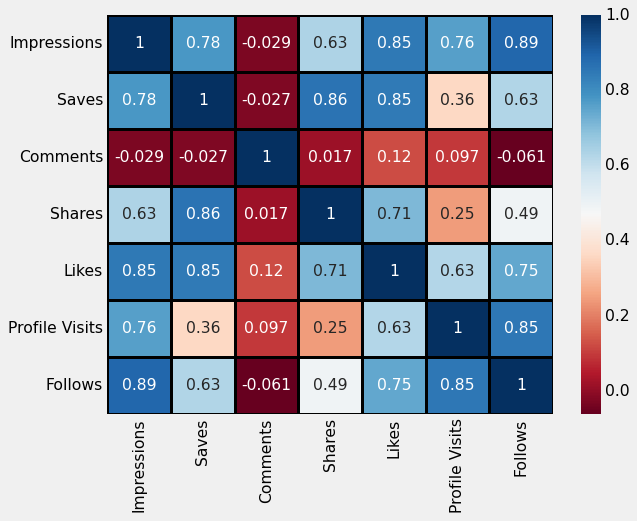

In [ ]:
sns.heatmap(df_corr.corr(),annot = True,linewidths=1,linecolor='Black',cmap='RdBu')

In [ ]:
corr_matrix

Impressions     Saves  Comments    Shares     Likes  \
Impressions        1.000000  0.779231 -0.028524  0.634675  0.849835   
Saves              0.779231  1.000000 -0.026912  0.860324  0.845643   
Comments          -0.028524 -0.026912  1.000000  0.016933  0.123586   
Shares             0.634675  0.860324  0.016933  1.000000  0.707794   
Likes              0.849835  0.845643  0.123586  0.707794  1.000000   
Profile Visits     0.760981  0.360628  0.096714  0.245361  0.626107   
Follows            0.889363  0.628461 -0.060631  0.493070  0.746333   

                Profile Visits   Follows  
Impressions           0.760981  0.889363  
Saves                 0.360628  0.628461  
Comments              0.096714 -0.060631  
Shares                0.245361  0.493070  
Likes                 0.626107  0.746333  
Profile Visits        1.000000  0.853152  
Follows               0.853152  1.000000

In [ ]:
correlation = df.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions             1.000000
From Explore            0.893607
Follows                 0.889363
Likes                   0.849835
From Home               0.844698
Saves                   0.779231
Profile Visits          0.760981
Shares                  0.634675
From Other              0.592960
From Hashtags           0.560760
data science caption    0.127737
Comments               -0.028524
Python hashtag         -0.071786
Name: Impressions, dtype: float64


In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

<Axes: xlabel='Impressions', ylabel='Density'>

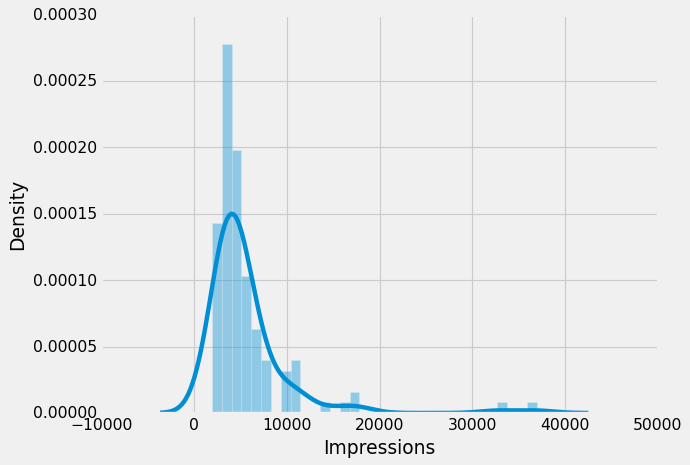

In [ ]:
sns.distplot(df['Impressions'])

In [ ]:
x = df[[ 'Follows','Comments','From Other','Python hashtag','data science caption']]
y = df['Profile Visits']

In [ ]:
x = sm.add_constant(x)
x.head()

const  Follows  Comments  From Other  Python hashtag  data science caption
0    1.0        2         9          56               1                     0
1    1.0       10         7          78               1                     1
2    1.0       12        11         533               1                     0
3    1.0        8        10          73               1                     0
4    1.0        0         5          37               1                     0

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

In [ ]:
model = sm.OLS(y_train, x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Profile Visits   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     144.4
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           3.86e-41
Time:                        17:21:42   Log-Likelihood:                -459.20
No. Observations:                  95   AIC:                             930.4
Df Residuals:                      89   BIC:                             945.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -16.9146 

PREDICTION

In [ ]:
from sklearn.linear_model import PassiveAggressiveRegressor

In [ ]:
x= df[['Likes', 'Shares', 'Profile Visits','Saves','Follows']]
y = df["Impressions"]
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                test_size=0.2,
                                                random_state=1502)

In [ ]:
model_pre = sm.OLS(y_train, x_train).fit()

In [ ]:
from sklearn import metrics
predictions = model_pre.predict(x_test)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error (MAE): 1855.3339773077357
Mean Squared Error (MSE): 11001440.987433441
Root Mean Squared Error (RMSE): 3316.8420202707034


In [ ]:
# example = ['Likes', 'Shares', 'Profile Visits','Saves','Follows']
x_new = np.array([120,4,25,55,14])
y_pre = model_pre.predict(x_new)
print(y_pre)

[2950.71545947]


In [ ]:
model = PassiveAggressiveRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8329733108103214

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
X = df[['Likes', 'Shares', 'Profile Visits','Saves','Follows']]
y = df['Impressions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1502)

model_rf = RandomForestRegressor(n_estimators=100, random_state=1502)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 1340.3504166666667
Mean Squared Error (MSE): 5912211.9419875
Root Mean Squared Error (RMSE): 2431.5040493463093


In [ ]:
feature_importance = pd.Series(model_rf.feature_importances_,
                       index = x_train.columns.values)


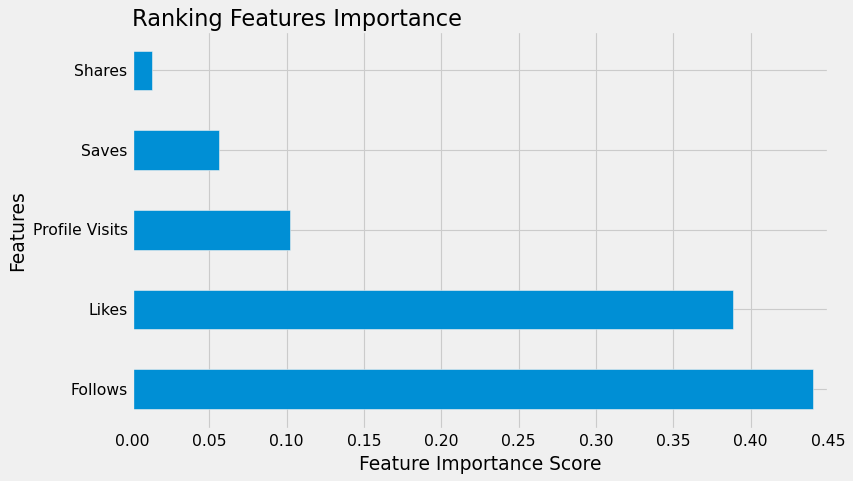

In [ ]:
top_features = feature_importance.nlargest(10)
top_features.plot(kind='barh', figsize=(10, 6))
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Ranking Features Importance', loc='left')
plt.show()